<a href="https://colab.research.google.com/github/wagner-alves-AI/PLN/blob/master/PLN__semana02_NLTK_Wagner_Alves_Da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processando textos usando o NLTK
## Tecnólogo em Inteligência Artificial Aplicada - Processamento de Linguagem Natural
Nesta atividade você entrará em contato com a biblioteca **NLTK**, que fornece uma série de funcionalidades essenciais para o processamento de textos, e o mais importante, dá suporte a essas funcionalidades para a língua portuguesa.
Além de fazermos um apanhado geral sobre as funcionalidades do NLTK, iremos tentar replicar algumas dessas funcionalidades e também utilizá-las na solução de alguns problemas.
As **expressões regulares** também serão exploradas para complementar algumas funcionalidades.

##**Natural Language Toolkit - NLTK**
Como o nome já diz, o NLTK é um toolkit para processamento de linguagem natural. Ele fornece várioas funcionalidades para criação de programas de PLN.
O NLTK foi desenvolvido com 4 objetivos principais:

1.    **Simplicidade**:	Fornecer um framework intuitivo junto a substanciais blocos de construção, dotando os usuários de um conhecimento prático de PLN sem prender-se nas tediosas tarefas de "arrumação da casa" geralmente associadas com o processamento de dados linguísticos anotados.
2.    **Consistência**:	Fornecer um framework unificado com interfaces e estruturas de dados consistentes, e nomes de método facilmente conjecturáveis
3.    **Extensibilidade**: Fornecer uma estrutura na qual novos módulos de software possam ser acomodados facilmente, incluindo implementações alternativas a abordagens diversas para uma mesma tarefa
4.    **Modularidade**:	Fornecer componentes que possam ser utilizados independentemente sem a necessidade de compreender o restante do toolkit




### **Importando a biblioteca NLTK**


In [ ]:
import nltk

O NLTK já vem instalado no Google Colab por padrão, porém, alguns recursos como corpora textuais podem não estar disponíveis. Para tal, você deve explicitamente recomendar seu download usando o comando a seguir:

In [ ]:
nltk.download()

### **Operações Básicas ou Pré-processamento**
As operações a seguir geralmente fazem parte de uma etapa do PLN chamada de **Pré-processamento**, e já se tornaram triviais a todos programas de PLN, pois preparam o texto bruto para ser realmente processado e "entendido" pela máquina.

*   Tokenização
*   Segmentação de sentenças
*   Normalização
*   Stemming
*   Lematização



#### Tokenização
Serve para separar o texto em *tokens* - que são uma sequência de caracteres com algum significado semântico.

**Principais dificuldades**:
*   "São Paulo" - uma ou duas palavras?
*   "A seleção dos E.U.A. venceu." - Pontuação pode ser considerada quebra de sentença
*   "Tromba d'água"
*   "São João da Boa Vista"
*   "Interação humano-computador"



In [ ]:
# Você deve importar o tokenizador da biblioteca NLTK
import nltk
from nltk import tokenize

# Caso não tenha feito o download de todos recursos do NLTK, você pode fazê-lo de maneira individual
#nltk.download('punkt')

texto = "Um exemplo de texto para visualizarmos a técnica de tokenização."

# Tokeniza o texto
tokens = tokenize.word_tokenize(texto, language='portuguese')

tokens

Quantos caracteres temos?

In [ ]:
len(texto)

Quantos tokens temos?

In [ ]:
len(tokens)

Quantos tokens únicos nós temos?

In [ ]:
# Usando funcionalidades básicas do Python
len(set(tokens))

In [ ]:
# Usando a biblioteca collections
from collections import Counter

contador = Counter(tokens)

for cont in contador.items():
  print(cont)

In [ ]:
# Mostra os termos mais frequentes
contador.most_common(3) 

#### Segmentação de sentenças
As regras principais de segmentação de sentenças contam com a divisão a partir de pontuações encontradas no texto ou quebras de linha.

![Exemplo de segmentação de sentença - Dan Jurafsky](https://docs.google.com/uc?export=download&id=15fLctvbOi8_STzO8AOzzW095yA2IvPmK)


In [ ]:
from nltk import sent_tokenize

texto = "Definição da sentença 1. Mais uma sentença. Última sentença."

sents = sent_tokenize(texto)
sents

#### Stemming
Reduz as palavras ao seu *stem*, retirando o sufixo. Faz com que palavras de mesmo significado semântico (ou similar) sejam escritas da mesma maneira (e.g., correr, correndo, correu). Geralmente o stem não é uma palavra válida.


In [ ]:
# Caso não tenha feito o download de todos recursos do NLTK, você pode fazê-lo de maneira individual
nltk.download('rslp')

# Inicia o Stemmer
stemmer = nltk.stem.RSLPStemmer()

print(stemmer.stem("ferro"))
print(stemmer.stem("ferreiro"))

print(stemmer.stem("correr"))
print(stemmer.stem("correu"))

In [ ]:
# Define uma função que faz Stemming em todo um texto
def Stemming(texto):
  stemmer = nltk.stem.RSLPStemmer()
  novotexto = []
  for token in texto:
    novotexto.append(stemmer.stem(token.lower()))
  return novotexto

texto1 = "Eu gostei de correr"
texto2 = "Eu gosto de corrida"

# Tokeniza o texto
tokens1 = tokenize.word_tokenize(texto1, language='portuguese')
tokens2 = tokenize.word_tokenize(texto2, language='portuguese')

novotexto1 = Stemming(tokens1)
novotexto2 = Stemming(tokens2)

print(novotexto1)
print(novotexto2)

#### Lematização
Similar ao processo de Stemming, porém, faz uma análise morfológica completa para identificar e remover os sufixos. Geralmente leva os verbos ao infinitivo e substantivos/adjetivos ao masculino singular. Se diferencia do Stemming pois sempre gera uma palavra válida.

Infelizmente, esta funcionalidade não é suportada pelo NLTK. [Neste link](https://lars76.github.io/nlp/lemmatize-portuguese/) você pode encontrar alternativas para realizar a lematização em português.

Para nossa disciplina iremos utilizar o stemmer, caso queira saber um pouco mais sobre o impacto dessa decisão, você pode ler [este capítulo](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) do livro de Information Retrieval da Universidade de Stanford.



#### Retirada de Stop-words
As vezes é necessário remover as palavras de maior ocorrência no conjunto de textos, pois geralmente elas não agregam grande valor semântico aos textos e não ajudam no processo de selecionar as informações relevantes ao sistema de PLN.

Este processo pode ser diferente, de acordo com a tarefa de PLN que você está executando, mas no geral temos duas abordagens: retirar as palavras de maior ocorrência levando em conta a [lei de Zipg](http://terrierteam.dcs.gla.ac.uk/publications/rtlo_DIRpaper.pdf), ou utilizar uma lista de stop-words pronta para seu idioma. Iremos realizar a segunda opção.

In [ ]:
# Caso não tenha feito o download de todos recursos do NLTK, você pode fazê-lo de maneira individual
nltk.download('stopwords')

# O NLTK fornece uma lista de stop-words para o idioma português
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords

In [ ]:
# Define uma função que remove as stop words de um texto
def removeStopWords(texto):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    novotexto = []
    for token in texto:
        if token.lower() not in stopwords:
            novotexto.append(token)
    return novotexto

texto = "Quais palavras serão retiradas deste texto? Eu não sei, mas este processo é necessário em alguns momentos."

# Tokeniza o texto
tokens = tokenize.word_tokenize(texto, language='portuguese')

novotexto = removeStopWords(tokens)

print(novotexto)

> **IMPORTANTE**: Em alguns casos retirar as palavras referentes a negação (i.e., não) pode retirar um significado semântico muito importante do texto. Por exemplo, no texto: "*O paciente não apresenta sintomas da doença*". Neste caso a negação muda completamente o sentido da frase. Existem alguns outros casos (principalmente quando utilizamos *Deep Learning*) em que **a retirada das stop-words pode ser prejudicial ao algoritmo**, portanto, sempre teste seus algoritmos com e sem esta opção!

![Pré-processamento nem sempre é benéfico](https://docs.google.com/uc?export=download&id=1kx5DedeB1X4AJTWD7Urdqz9HzZ62D5FW)



#### Normalização
Além do Stemming, é possível realizar processos mais específicos de normalização do texto, de acordo com a tarefa.

> **Exemplo 1**: Para um algoritmo de Geração de fala, o texto bruto pode estar escrito como "Com os preços de R\$ 100,00 para a primeira versão, e R\$ 10,00 para a segunda". Para o meu algoritmo é mais interessante que o texto seja normalizado para: "Com os preços de cem reais para a primeira versão e dez reais para a segunda"

> **Exemplo 2**: Todas as datas serem normalizadas para um padrão único. As formas "18/mai", "dezoito de maio", "18-05" serem normalizadas para "18/05".

> **Pergunta rápida**: Nos casos acima qual recurso nos ajudaria a fazer a normalização?

Uma maneira simples de normalizar o texto é transformar todas as letras em minúsculas, assim ocorrências escritas de maneira diferente são normalizadas para uma única. "Brasil", "BraSil" e "BRAsil" seriam normalizadas para "brasil".

In [ ]:
texto = "Se escreve LOL, LoL ou Lol?"

# Efetua lowercase
texto = texto.lower()

# Tokeniza o texto
tokenize.word_tokenize(texto, language='portuguese')

### **A coleção de corpora do NLTK**
O NLTK contém diversos corpora disponíveis, inclusive para língua portuguesa. 
> **DEFINIÇÃO**: Um corpus é uma coleção de documentos.


In [ ]:
# Importa o corpus dos livros de Machado de Assis
from nltk.corpus import machado

nltk.download('machado')

In [ ]:
# Cada arquivo corresponde a um livro
machado.fileids()

#machado.readme()

In [ ]:
# Obtém o texto de "Memórias Póstumas de Brás Cubas"
texto = machado.raw('romance/marm05.txt')
texto

In [ ]:
# Você pode selecionar uma parte específica do texto
texto[9:40]

### **Part-of-speech Tagging (POS-Tagging)**
Esta também pode ser considerada uma das operações básicas de PLN, e tem por objetivo definir o valor morfológico de cada palavra no texto (e.g., substantivo, adjetivo, verbo, artigo, advérbio). 

O objetivo da morfologia é estudar a estrutura interna e a variabilidade das palavras em uma língua, como conjugações verbais, plurais, nominalização, etc.

Ao contrário dos processos mostrados até agora, este depende do treinamento de um algoritmo supervisionado de *Machine Learning*, treinado a partir de **corpus anotado com as informações morfológicas de cada palavra**.
> **DEFINIÇÃO**: Um corpus anotado, é uma coleção de documentos etiquetada por humanos para identificar determinado valor morfológico, sintático ou semântico do texto.

No caso a seguir, estaremos trabalhando com um corpus anotado com informações morfológicas de palavras.

#### Principais dificuldades
As principais dificuldades na realização deste processo são:


*   **Ambiguidade**: uma mesma palavra pode ter papéis diferentes de acordo com o contexto (e.g., "Ele deu um parecer" - "O verbo parecer")
*   **Palavras fora do vocabulário**: quando nosso corpus não contém alguma palavra, fica difícil para o POS-Tagger "adivinhar" o valor morfológico da palavra. Isso é especialmente comum quando utilizar um POS-Tagger treinado em um domínio em textos de algum domínio específico, por exemplo, utilizar um POS-Tagger treinado em textos jornalísticos para marcação de um texto de prontuários de pacientes.



#### Corpus anotado MacMorpho
É um corpus de notícias em português, com mais de um milhão de palavras de textos jornalísticos da Folha de São Paulo. Todo o corpus foi taggeado/etiquetado com os valores morfológicos para cada palavra

In [ ]:
from nltk.corpus import mac_morpho
#nltk.download('mac_morpho')
# Palavras no corpus
mac_morpho.words()

In [ ]:
# Sentenças
mac_morpho.sents()

In [ ]:
# A palavras e suas tags
mac_morpho.tagged_words()

In [ ]:
mac_morpho.tagged_sents()

In [ ]:
# Vamos contar a quantidade de tokens
len(mac_morpho.words())

In [ ]:
# Palavras únicas
len(nltk.FreqDist(mac_morpho.words()))

In [ ]:
# Palavra mais frequente
nltk.FreqDist(mac_morpho.words()).max()

#### Treinando o POS-Tagging do NLTK
Podemos utilizar um corpus anotado morfologicamente para treinar o POS-Tagger do NLTK

In [ ]:
from nltk.corpus import mac_morpho

#Obtém as sentenças taggeadas
tagged_sents = mac_morpho.tagged_sents()

# Divide-as em duas partes - uma maior, para TREINAMENTO - e outra menor, para TESTE
train_tsents = tagged_sents[100:] # Todas sentenças após as 100 primeiras
test_tsents = tagged_sents[:100] # Pega todas sentenças até a centésima

In [ ]:
from nltk import DefaultTagger

# Define um tagger padrão, que sempre etiquetará a palavra com "N" = "NOUM" = "SUBSTANTIVO", visto que é a tag que mais ocorre
tagger0 = DefaultTagger("N")
# Avalia a acurácia do POS-Tagger ao etiquetar as sentenças de TESTE
tagger0.evaluate(test_tsents)

In [ ]:
from nltk import UnigramTagger

# Define um tagger Unigram (falaremos mais sobre isso depois)
# Este tagger aprende ao ver as sentenças etiquetadas na base de TREINAMENTO
# Além disso, utiliza o DefaultTagger caso não saiba o que marcar
tagger1 = UnigramTagger(train_tsents, backoff=tagger0)
tagger1.evaluate(test_tsents)

In [ ]:
from nltk import BigramTagger

# Define um tagger Bigram (falaremos mais sobre isso depois)
tagger2 = BigramTagger(train_tsents, backoff=tagger1)
tagger2.evaluate(test_tsents)

In [ ]:
# Existe ainda mais um POS-Tagger no NLTK, o TnT
from nltk.tag import tnt
tnt_pos_tagger = tnt.TnT()
tnt_pos_tagger.train(train_tsents)
tnt_pos_tagger.evaluate(test_tsents)

In [ ]:
# Se deseja apenas realizar o POS-Tagging, e não avaliar
tagger2.tag(tokenize.word_tokenize(texto, language='portuguese'))

Caso queira armazenar o modelo treinado para evitar o re-treinamento veja a seção 5.6 deste [link](https://www.nltk.org/book/ch05.html).

##**ATIVIDADE PRÁTICA**
A seguir algumas práticas relacionadas às operações básicas de PLN, NLTK e expressões regulares.

In [32]:
# Texto de exemplo
texto = """A morte supersônica
O Concorde era um avião incrível. Inclusive no quesito segurança. Até que, um dia, aconteceu algo que ninguém poderia prever.

Com asas alongadas e viradas para trás, cabine bem estreita e bico fino – que deslizava para baixo durante o pouso, para melhorar a visibilidade do piloto –, o Concorde é um dos aviões mais bonitos de todos os tempos. E um dos mais avançados também.

Desenvolvido nos anos 1960 por um consórcio de empresas francesas e inglesas (que hoje se chama Airbus), ele foi um dos únicos dois aviões supersônicos a operar comercialmente (o outro foi o soviético Tupolev Tu-144). Tinha quatro motores ultrapotentes, que queimavam 25 mil litros de combustível por hora – quase o dobro de um Boeing 747 -, e viajava a 60 mil pés de altitude, 20 mil a mais que os outros aviões. Usava tecnologias revolucionárias, como um sistema que desacelerava a passagem do ar dentro das turbinas (do contrário, elas explodiriam antes que o avião atingisse sua velocidade máxima). Tudo para alcançar a glória de voar a 2.179 km/h, duas vezes a velocidade do som. É o dobro dos aviões comuns, e permitia atravessar o planeta com uma rapidez que até hoje impressiona – ir de Londres a Nova York em três horas, por exemplo.

O Concorde começou a operar em 1976. Uma das primeiras linhas fazia o trajeto Paris-Rio de Janeiro, com dois voos semanais. O público ficou maravilhado com a aeronave, mas voar nela era para poucos: as passagens eram ainda mais caras que as dos voos de primeira classe, e ultrapassavam US$ 10 mil em valores de hoje. Mas manter a frota de Concordes era ainda mais caro, e a British Airways e a Air France, que operavam os aviões, tinham prejuízo com eles. É que, para que os voos dessem lucro, cada avião precisava decolar com pelo menos 90% dos assentos ocupados, o que nem sempre acontecia (a linha brasileira tinha ocupação média de 50%, e por isso foi uma das primeiras a deixarem de existir, em 1982).

Mesmo assim, ele continuou operando comercialmente, com voos ligando a Europa e os EUA, até o dia 25 de julho de 2000. Nesse dia, o Concorde F-BTSC da Air France (um dos únicos 26 a serem produzidos) saiu do aeroporto Charles de Gaulle, em Paris, com destino a Nova York. Levava cem passageiros e nove tripulantes – e, descobriu-se depois, estava sobrecarregado, com 810 kg a mais do que o peso máximo permitido. Na decolagem, aconteceu uma das cenas mais impressionantes da história da aviação. Durante a aceleração inicial, com o Concorde ainda no chão, um dos tanques de combustível explodiu. Os pilotos perceberam, mas já tinham percorrido boa parte da pista – só tinham mais 2 km, espaço insuficiente para frear o avião e abortar o voo com segurança. A única saída era tentar decolar – coisa que eles fizeram, com o Concorde pegando fogo.

As consequências foram dramáticas. Os motores 1 e 2 pifaram, e com isso a aeronave foi se inclinando violentamente para o lado. Para tentar compensar isso, e forçar o Concorde ferido a voar reto, os pilotos desaceleraram os motores 3 e 4, do outro lado. O avião caiu logo depois, nas redondezas do aeroporto. Todos os ocupantes morreram, e também houve quatro vítimas fatais em solo, que foram atingidas por pedaços do avião. O acidente chocou o mundo e devastou a imagem do Concorde, que nunca havia enfrentado um acidente grave e até então era considerado um dos aviões mais seguros da história.

A frota foi inspecionada e voltou a operar comercialmente. Mas aí, em 2001, aconteceram os atentados de 11 de Setembro, que deixaram as pessoas com medo de voar. O Concorde não teve nada a ver com eles, mas também foi afetado pela forte queda na venda de passagens aéreas. E se tornou, de uma vez por todas, economicamente inviável. Foi aposentado – com direito, apenas, a uma curta série de voos de despedida, para os fãs do avião, realizados pela British Airways em 2003.

O verdadeiro culpado

Como um relatório do governo francês constatou depois, o acidente fatal não aconteceu por defeitos no Concorde (nem pelo excesso de peso). Foi por causa de outro avião: um DC-10 da Continental Airlines, que decolou cinco minutos antes. Esse avião teve manutenção malfeita, e por isso soltou um pedaço de metal na pista. Era uma faixa de titânio, com 40 cm de comprimento e 3 cm de largura, que caiu de uma das turbinas. Ninguém percebeu, a peça ficou lá – e o Concorde passou bem por cima dela. Isso rasgou um de seus pneus, que estourou. A onda de choque rompeu um dos tanques de combustível do Concorde, detonando o incêndio que derrubou o avião."""

### 1) Usando expressões regulares desenvolva seu próprio tokenizador. Compare o seu resultado com o tokenizador do NLTK.

In [ ]:
import re
meu_tokenize = re.findall(r"[A-Za-záÁéÉíÍóÓúÚçÇâÂêÊôÔãÃõÕ-]+",texto)
meu_tokenize

In [ ]:
import nltk
from nltk import tokenize
nltk.download('punkt')
tokens = tokenize.word_tokenize(texto,language='portuguese')
tokens

### 2) Mostre o tamanho do texto (em caracteres)

In [ ]:
len(texto)

4539

### 3) Mostre o tamanho do texto (em tokens)

In [43]:
len(tokens)

917

### 4) Mostre a quantidade de tokens únicos do texto

In [ ]:
len(set(tokens))

416

### 5) Realize o Stemming no texto, e mostre novamente a quantidade de tokens únicos

In [ ]:
nltk.download('rslp')

def Stemming(texto):
  stemmer = nltk.stem.RSLPStemmer()
  novotexto = []
  for token in texto:
    novotexto.append(stemmer.stem(token.lower()))
  return novotexto




In [ ]:
texto1 = texto
tokens1 = tokenize.word_tokenize(texto1)

novotexto1 = Stemming(tokens1)

print(novotexto1)

In [ ]:
len(set(novotexto1))

351

### 6) Realize a normalização para lowercase e mostre novamente a quantidade de tokens únicos

In [ ]:
texto_normal = texto
texto_normal = texto.lower()

tokens_normal = tokenize.word_tokenize(texto_normal,language='portuguese')

len(set(tokens_normal))

396

### 7) Realize a retirada de stop words (utilizando o conjunto do NLTK) e mostre a quantidade de tokens no texto

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
def removeStopWords(texto):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    novotexto = []
    for token in texto:
        if token.lower() not in stopwords:
            novotexto.append(token)
    return novotexto
  
  

In [45]:
texto_nonstop = texto
tokens_nonstop = tokenize.word_tokenize(texto_nonstop,language='portuguese')

novotexto2 = removeStopWords(tokens_nonstop)

print(novotexto2)

['morte', 'supersônica', 'Concorde', 'avião', 'incrível', '.', 'Inclusive', 'quesito', 'segurança', '.', ',', 'dia', ',', 'aconteceu', 'algo', 'ninguém', 'poderia', 'prever', '.', 'asas', 'alongadas', 'viradas', 'trás', ',', 'cabine', 'bem', 'estreita', 'bico', 'fino', '–', 'deslizava', 'baixo', 'durante', 'pouso', ',', 'melhorar', 'visibilidade', 'piloto', '–', ',', 'Concorde', 'aviões', 'bonitos', 'todos', 'tempos', '.', 'avançados', '.', 'Desenvolvido', 'anos', '1960', 'consórcio', 'empresas', 'francesas', 'inglesas', '(', 'hoje', 'chama', 'Airbus', ')', ',', 'únicos', 'dois', 'aviões', 'supersônicos', 'operar', 'comercialmente', '(', 'outro', 'soviético', 'Tupolev', 'Tu-144', ')', '.', 'quatro', 'motores', 'ultrapotentes', ',', 'queimavam', '25', 'mil', 'litros', 'combustível', 'hora', '–', 'quase', 'dobro', 'Boeing', '747', '-', ',', 'viajava', '60', 'mil', 'pés', 'altitude', ',', '20', 'mil', 'outros', 'aviões', '.', 'Usava', 'tecnologias', 'revolucionárias', ',', 'sistema', 'des

In [ ]:
novotexto2

In [46]:
len(tokens_nonstop)

917

### 8) Remova todas pontuações do texto (exceto quando estiver sendo usado como separador decimal)

In [50]:
re.split(r"[^\w\s]",texto)

['A morte supersônica\nO Concorde era um avião incrível',
 ' Inclusive no quesito segurança',
 ' Até que',
 ' um dia',
 ' aconteceu algo que ninguém poderia prever',
 '\n\nCom asas alongadas e viradas para trás',
 ' cabine bem estreita e bico fino ',
 ' que deslizava para baixo durante o pouso',
 ' para melhorar a visibilidade do piloto ',
 '',
 ' o Concorde é um dos aviões mais bonitos de todos os tempos',
 ' E um dos mais avançados também',
 '\n\nDesenvolvido nos anos 1960 por um consórcio de empresas francesas e inglesas ',
 'que hoje se chama Airbus',
 '',
 ' ele foi um dos únicos dois aviões supersônicos a operar comercialmente ',
 'o outro foi o soviético Tupolev Tu',
 '144',
 '',
 ' Tinha quatro motores ultrapotentes',
 ' que queimavam 25 mil litros de combustível por hora ',
 ' quase o dobro de um Boeing 747 ',
 '',
 ' e viajava a 60 mil pés de altitude',
 ' 20 mil a mais que os outros aviões',
 ' Usava tecnologias revolucionárias',
 ' como um sistema que desacelerava a passage

### 9) Encontre todos os valores associados a unidades de medida no texto (e.g., cm, kg)

In [ ]:
re.findall(r"([\d]+)[\s\D]*",texto)

### 10) Realize o treinamento do BigramTagger e do TnT tagger usando o corpus Floresta disponível no NLTK. Após o treinamento realize o tageamento do texto.

In [ ]:
from nltk.corpus import floresta
from nltk.tag import BigramTagger
from nltk.tag import tnt
from nltk import tokenize
nltk.download('floresta')

In [53]:
#Obtém as sentenças taggeadas
tagged_sents = floresta.tagged_sents()

# Divide-as em duas partes - uma maior, para TREINAMENTO - e outra menor, para TESTE
train_tsents = tagged_sents[100:] # Todas sentenças após as 100 primeiras
test_tsents = tagged_sents[:100] # Pega todas sentenças até a centésima

In [54]:
bigram_pos = BigramTagger(train_tsents)
bigram_pos.evaluate(test_tsents)

0.09132906894100924

In [55]:
tnt_pos_tagger = tnt.TnT()
tnt_pos_tagger.train(train_tsents)
tnt_pos_tagger.evaluate(test_tsents)

0.8333333333333334

In [ ]:
tnt_pos_tagger.tag(tokenize.word_tokenize(texto, language='portuguese'))

In [ ]:
bigram_pos.tag(tokenize.word_tokenize(texto,language='portuguese'))

### 11) Crie uma expressão regular para obter no nome de todas pontifícias univerdades católicas do texto a seguir.

In [56]:
textoUniv = """A seguir uma lista de todas pontifícias universidades católicas no Brasil.
- Pontifícia Universidade Católica do Rio de Janeiro
- Pontifícia Universidade Católica de São Paulo
- Pontifícia Universidade Católica de Campinas
- Pontifícia Universidade Católica de Minas Gerais
- Pontifícia Universidade Católica do Rio Grande do Sul
- Pontifícia Universidade Católica do Paraná
- Pontifícia Universidade Católica de Goiás

Todas estas universidades são mantidas pela Igreja Católica."""

In [57]:
re.findall(r"\- [Pontifícia Universidade Católica].*",textoUniv)

['- Pontifícia Universidade Católica do Rio de Janeiro',
 '- Pontifícia Universidade Católica de São Paulo',
 '- Pontifícia Universidade Católica de Campinas',
 '- Pontifícia Universidade Católica de Minas Gerais',
 '- Pontifícia Universidade Católica do Rio Grande do Sul',
 '- Pontifícia Universidade Católica do Paraná',
 '- Pontifícia Universidade Católica de Goiás']

### 12) Monte no PANDAS uma tabela de frequencia dos TOP 10 tokens

In [ ]:
from collections import Counter
contador = Counter(novotexto2)
for cont in contador.items():
  print(cont)

In [77]:
contador.most_common(10)

[(',', 66),
 ('.', 40),
 ('Concorde', 12),
 ('avião', 10),
 ('–', 9),
 ('aviões', 6),
 ('(', 6),
 (')', 6),
 ('voos', 5),
 ('mil', 4)]

In [97]:
import pandas as pd
dados = {
    'Tokens':[',', '.' , 'Concorde', 'avião','-','aviões','(',')','voos','mil'],
'Frequência':[66,40,12,10,9,6,6,6,5,4]
}
df = pd.DataFrame(dados)
display(df)

,Tokens,Frequência
0,",",66
1,.,40
2,Concorde,12
3,avião,10
4,-,9
5,aviões,6
6,(,6
7,),6
8,voos,5
9,mil,4


### 13) Apresente um gráfico baseados nas tabelas acima

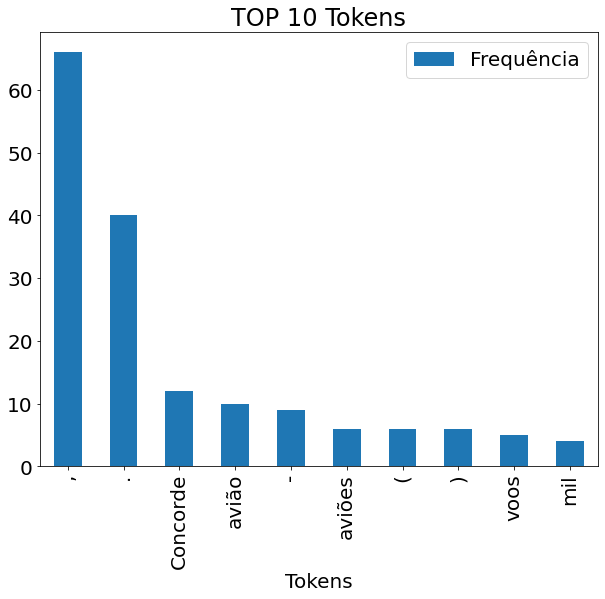

In [101]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

df.plot(kind='bar', x='Tokens', y='Frequência', title='TOP 10 Tokens');

## Referências e Material complementar

*   [Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book/)
*   [Stanford - Information Retrieval Book - Chapter 2](https://nlp.stanford.edu/IR-book/)
*   [Técnicas de pré-processamento de Texto - Prof. Fernando Vieira da Silva](https://www.kaggle.com/fernandojvdasilva/aplica-es-em-nlp-aula-02)
*   [101 NLP Exercises (using modern libraries)](https://www.machinelearningplus.com/nlp/nlp-exercises/)


Este notebook foi produzido por Prof. [Lucas Oliveira](http://lattes.cnpq.br/3611246009892500).